**Importing Data Set**

In [ ]:
#importing data set

from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Teams.csv'
df = pd.read_csv(path)
df.head()



Mounted at /content/drive


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


**Part 2: Data Quality and Documentation**





In [ ]:

import numpy as np
# completeness – checking for missing values
# ============================================================

missing_pct = df.isnull().mean().sort_values(ascending=False) * 100
missing_summary = missing_pct[missing_pct > 0]
print("\n🔍 Missing Data Summary (percent of missing values):")
display(missing_summary)

rows_with_missing = df[df.isnull().any(axis=1)].shape[0]
print(f"\nTotal rows with missing data: {rows_with_missing}")

# ============================================================
# consistency – checking for duplicate records
# ============================================================

exact_dupes = df[df.duplicated()]
print(f"\n🔍 Exact duplicate records found: {len(exact_dupes)}")

potential_dupes = df[df.duplicated(subset=['yearID','teamID'], keep=False)]
print(f"Potential duplicates by year/team: {len(potential_dupes)}")
display(potential_dupes.head())

# ============================================================
# validity / accuracy – identifying outliers and anomalies
# ============================================================

numeric_cols = df.select_dtypes(include=np.number).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_flags = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
outlier_counts = outlier_flags.sum().sort_values(ascending=False)

print("\n🔍 Outlier counts per numeric variable:")
display(outlier_counts[outlier_counts > 0].head(15))

for col in outlier_counts.head(5).index:
    print(f"\nExamples of potential outliers in {col}:")
    display(df[[col]].sort_values(by=col, ascending=False).head())

# ============================================================
# consistency – checking for formatting and category issues
# ============================================================

object_cols = df.select_dtypes(include='object').columns
print("\n🔍 Checking categorical variable consistency:")

for col in object_cols:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) < 15:
        print(f"{col}: {list(unique_vals)}")
    else:
        print(f"{col}: {len(unique_vals)} unique values")

# ============================================================
# validity – verifying data types
# ============================================================

print("\n🔍 Data types of each variable:")
display(df.dtypes)

for col in object_cols:
    try:
        df[col].astype(float)
        print(f"⚠️ {col} may contain numeric values stored as text.")
    except:
        pass



🔍 Missing Data Summary (percent of missing values):


,0
HBP,82.887701
SF,82.887701
WCWin,77.754011
DivWin,55.080214
divID,54.081996
CS,30.623886
Ghome,14.224599
WSWin,12.727273
DP,11.301248
attendance,9.946524



Total rows with missing data: 2325

🔍 Exact duplicate records found: 0
Potential duplicates by year/team: 0


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro



🔍 Outlier counts per numeric variable:


,0
G,424
IPouts,424
FP,293
AB,274
E,267
H,225
HA,211
BB,183
BBA,182
ER,124



Examples of potential outliers in G:


,G
1394,165
1387,165
1427,164
1422,164
2040,164



Examples of potential outliers in IPouts:


,IPouts
1430,4518
1529,4491
2715,4485
1780,4479
1624,4473



Examples of potential outliers in FP:


,FP
2717,0.991
2741,0.990
2508,0.989
2543,0.989
2439,0.989



Examples of potential outliers in AB:


,AB
2240,5781
2419,5769
1503,5767
2544,5757
2211,5756



Examples of potential outliers in E:


,E
120,639
183,637
130,633
199,628
109,624



🔍 Checking categorical variable consistency:
lgID: ['NL', 'AA', 'UA', 'PL', 'AL', 'FL']
teamID: 149 unique values
franchID: 120 unique values
divID: ['W', 'E', 'C']
DivWin: ['Y', 'N']
WCWin: ['N', 'Y']
LgWin: ['N', 'Y']
WSWin: ['N', 'Y']
name: 139 unique values
park: 212 unique values
teamIDBR: 101 unique values
teamIDlahman45: 148 unique values
teamIDretro: 149 unique values

🔍 Data types of each variable:


,0
yearID,int64
lgID,object
teamID,object
franchID,object
divID,object
Rank,int64
G,int64
Ghome,float64
W,int64
L,int64


**Part 3: Comprehensive Data Cleaning**
Explanation and justification can be found on google doc.

In [ ]:

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Teams.csv'
df = pd.read_csv(path)
df.head()

# ============================================================
# handle missing data – Module 3 technique
# ============================================================

# First, mark high-missing historical fields with "Not Available"
flag_cols = ["HBP", "SF", "WCWin"]
for col in flag_cols:
    if col in df.columns:
        df[col] = df[col].fillna("Not Available")

# Re-identify numeric and categorical columns AFTER flags added
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Median imputation for numeric fields
num_imputer = SimpleImputer(strategy="median")
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Mode imputation for categorical fields
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("✅ Missing values handled (median/mode imputation + 'Not Available' fills).")

# ============================================================
# handle duplicates – Module 3 approach
# ============================================================

before_dupes = df.shape[0]
df = df.drop_duplicates()
after_dupes = df.shape[0]
print(f"✅ Duplicates removed: {before_dupes - after_dupes}")

# ============================================================
# fix data types – Module 4 standardization
# ============================================================

id_cols = ["teamID", "franchID", "lgID", "divID", "teamIDBR", "teamIDlahman45", "teamIDretro"]
for col in id_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.upper().str.strip()

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("✅ Data types standardized and identifiers converted.")

# ============================================================
# outlier treatment – Module 4 IQR method
# ============================================================

def cap_outliers(series):
    Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return np.clip(series, lower, upper)

for col in ["ERA", "attendance", "R"]:
    if col in df.columns:
        df[col] = cap_outliers(df[col])

print("✅ Outliers capped using IQR method (Module 4).")

# ============================================================
# standardize text – Module 4 data standardization
# ============================================================

if "name" in df.columns:
    df["name"] = df["name"].str.title().str.strip()
if "park" in df.columns:
    df["park"] = df["park"].str.title().str.strip()

print("✅ Text fields standardized (title case, trimmed).")

# ============================================================
# scale continuous variables – Module 4 normalization
# ============================================================

scaler = MinMaxScaler()
scale_cols = [c for c in ["ERA", "attendance", "R"] if c in df.columns]
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("✅ Continuous variables scaled to 0–1 range using Min-Max scaling.")

# ============================================================
# validation summary – Module 4 validation
# ============================================================

missing_after = df.isnull().sum().sum()
print(f"\nRemaining missing values: {missing_after}")
print(f"Final dataset shape: {df.shape}")

# export cleaned dataset
df_cleaned = df.copy()
df_cleaned.to_csv("Teams_Cleaned.csv", index=False)
print("✅ Exported: Teams_Cleaned.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Missing values handled (median/mode imputation + 'Not Available' fills).
✅ Duplicates removed: 0
✅ Data types standardized and identifiers converted.
✅ Outliers capped using IQR method (Module 4).
✅ Text fields standardized (title case, trimmed).
✅ Continuous variables scaled to 0–1 range using Min-Max scaling.

Remaining missing values: 0
Final dataset shape: (2805, 48)
✅ Exported: Teams_Cleaned.csv


**Part 4: Strategic Feature Engineering**

In [ ]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("Teams_Cleaned.csv")

# ============================================================
# Variable 1 – Offensive Efficiency (ratio method)
# ------------------------------------------------------------
# Measures runs scored per hit (R ÷ H)
# ============================================================
df["OffEff"] = df["R"] / df["H"]

# ============================================================
# Variable 2 – Pitching Control Ratio (ratio method)
# ------------------------------------------------------------
# Strikeouts per walk (SO ÷ BB) indicates command and efficiency
# ============================================================
df["PitchControl"] = df["SO"] / (df["BB"] + 1)  # +1 prevents division by zero

# ============================================================
# Variable 3 – Attendance per Win (ratio method)
# ------------------------------------------------------------
# Shows fan engagement per team success (attendance ÷ wins)
# ============================================================
df["AttendPerWin"] = df["attendance"] / (df["W"] + 1)

# ============================================================
# Variable 4 – Team Performance Tier (binning method)
# ------------------------------------------------------------
# Categorizes teams into performance groups based on win percentage
# ============================================================
df["WinPct"] = df["W"] / df["G"]

bins = [0, 0.45, 0.55, 0.65, 1.0]
labels = ["Low Performing", "Average", "Above Average", "Elite"]
df["PerformanceTier"] = pd.cut(df["WinPct"], bins=bins, labels=labels, include_lowest=True)

# Preview new engineered variables
df[["yearID", "teamID", "OffEff", "PitchControl", "AttendPerWin", "PerformanceTier"]].head()

# Export updated dataset
df.to_csv("Teams_FeatureEngineered.csv", index=False)
print("✅ Created 4 engineered variables using ratio and binning methods.")

✅ Created 4 engineered variables using ratio and binning methods.


**Part 5: Thorough Exploratory Data Analysis**

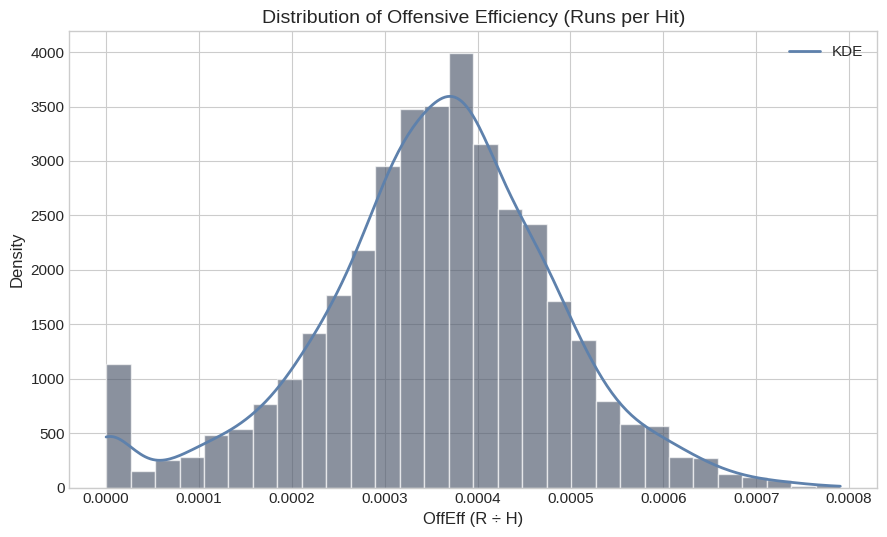

Histogram: This graph shows the distribution of the offensive efficiency of all teams across the entire time frame. Most teams fall into the .0004 offensive efficiency bucket. It's interesting to see how rare certain offensive outputs can be.



/tmp/ipython-input-4203903058.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups,labels=["Low Performing","Average","Above Average","Elite"],


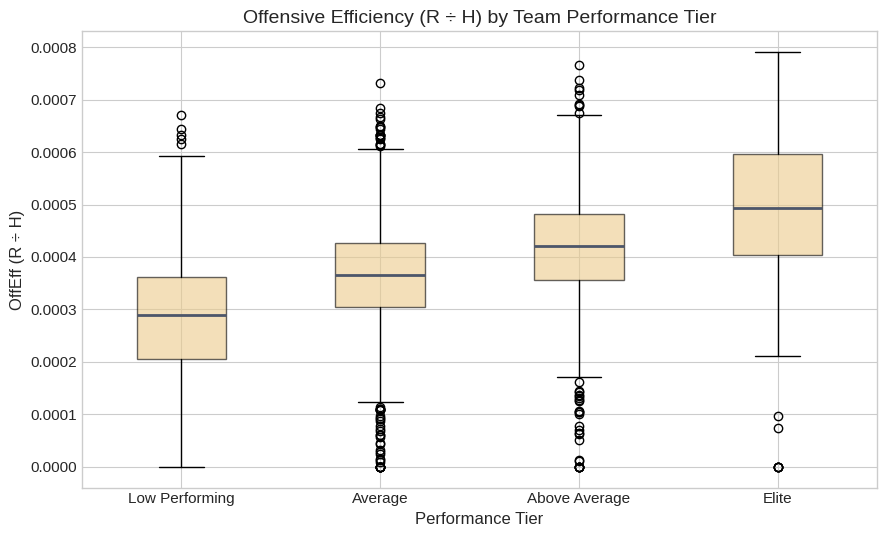

Box and Whisker: There is a clear rise in offensive efficiency as the tier of the team goes up. However, it's important to note that there are occasions where a team could have a really high offensive output but still be low performing and vice versa. That can be shown by the data points at the end of each range.



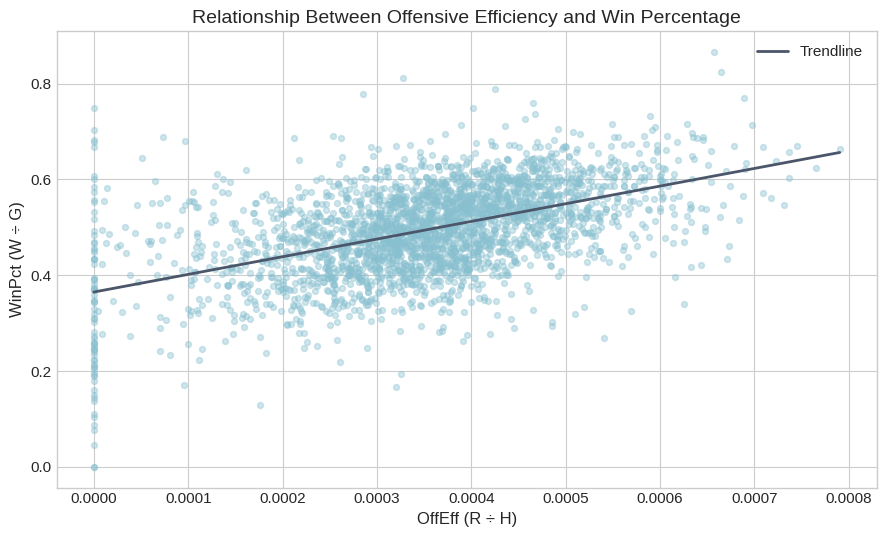

First Scatter Plot: There is a clear positive correlation between offensive efficiency and win percentage. Meaning that efficient lineups consistently win more baseball games.



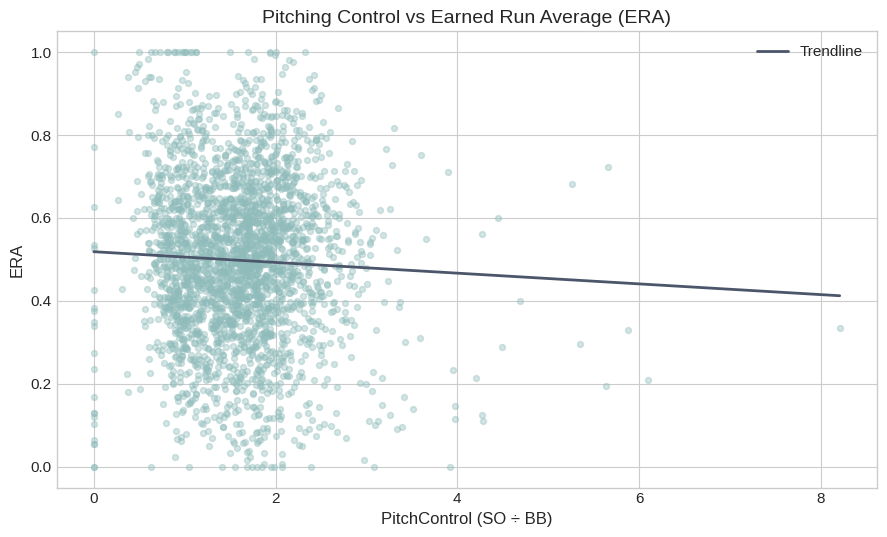

Second Scatter Plot: This didn’t come out as good as I wanted it to. But there is still a negative correlation between pitch control and ERA. Meaning the higher the pitch control the lower the ERA.



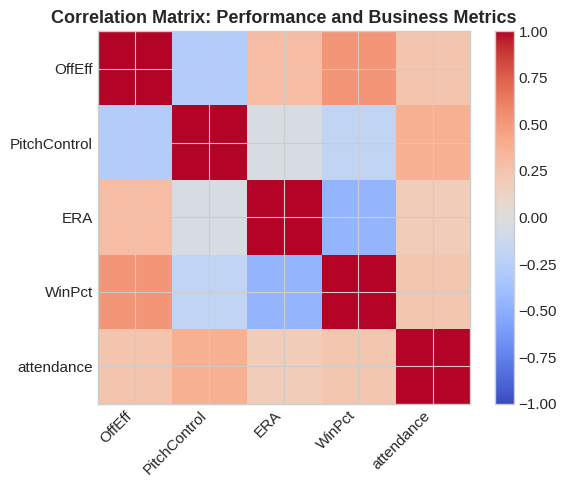

Summary: The correlation matrix reveals clear patterns among team performance metrics. WinPct correlates positively with both Offensive Efficiency and Attendance, while ERA shows a strong negative relationship with winning. These patterns reinforce that offensive production and pitching quality drive success, and success in turn drives fan engagement.



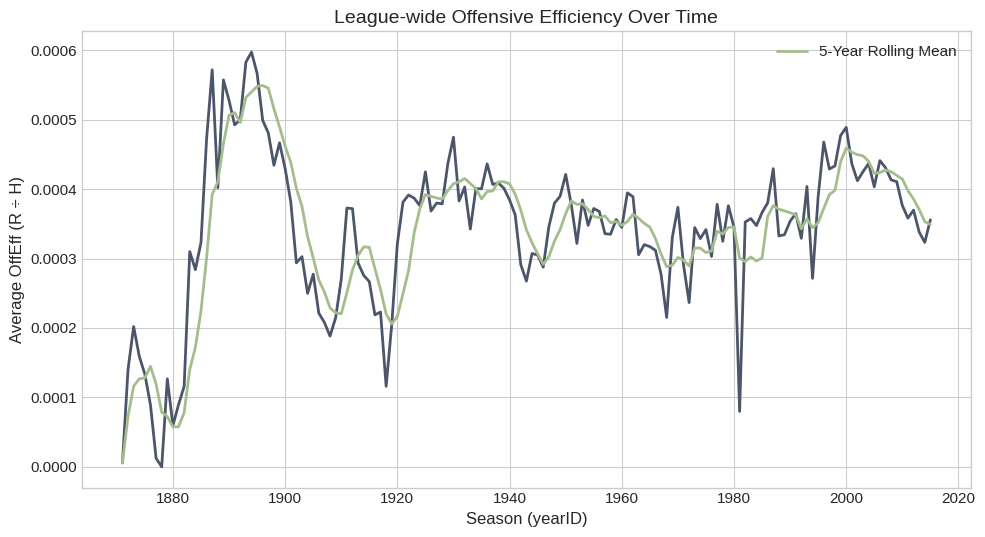

Last Line Graph: This visual shows the overall trend in offensive efficiency over the time period. Certain eras see huge peaks and drop offs and can be explained by historical phenomenon like the steroid era in the 90s.



In [ ]:
# ============================================================
# ⚾ FINAL EDA NOTEBOOK BLOCK – DYLAN'S VERSION (Prints YOUR text)
# ============================================================
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({"figure.figsize":(9,5.5),"axes.titlesize":14,"axes.labelsize":12,"font.size":11})
neutral_colors=["#4C566A","#5E81AC","#A3BE8C","#EBCB8B","#88C0D0","#8FBCBB","#D8DEE9"]

# --- Load dataset ---
paths=["/content/Teams_FeatureEngineered.csv","/content/Teams_Cleaned.csv","/content/Teams.csv"]
for p in paths:
    if os.path.exists(p):
        df=pd.read_csv(p);break

# --- Ensure engineered variables exist ---
if "WinPct" not in df: df["WinPct"]=df["W"]/df["G"]
if "OffEff" not in df: df["OffEff"]=df["R"]/df["H"]
if "PitchControl" not in df: df["PitchControl"]=df["SO"]/(df["BB"]+1)
if "PerformanceTier" not in df:
    bins=[0,0.45,0.55,0.65,1.0];labs=["Low Performing","Average","Above Average","Elite"]
    df["PerformanceTier"]=pd.cut(df["WinPct"],bins=bins,labels=labs,include_lowest=True)
if "yearID" not in df: df["yearID"]=np.arange(len(df))+1900

def _nn(series): return pd.to_numeric(series, errors="coerce")

# ------------------------------------------------------------
# 1. Histogram
# ------------------------------------------------------------
x=_nn(df["OffEff"]).dropna()
plt.hist(x,bins=30,density=True,color=neutral_colors[0],alpha=.65,edgecolor="white")
try:
    from scipy.stats import gaussian_kde
    grid=np.linspace(x.min(),x.max(),300)
    plt.plot(grid,gaussian_kde(x)(grid),color=neutral_colors[1],lw=2,label="KDE");plt.legend(frameon=False)
except: pass
plt.title("Distribution of Offensive Efficiency (Runs per Hit)")
plt.xlabel("OffEff (R ÷ H)");plt.ylabel("Density");plt.tight_layout();plt.show()

print("Histogram: This graph shows the distribution of the offensive efficiency of all teams across the entire time frame. "
      "Most teams fall into the .0004 offensive efficiency bucket. It's interesting to see how rare certain offensive outputs can be.\n")

# ------------------------------------------------------------
# 2. Box and Whisker
# ------------------------------------------------------------
data=df[["OffEff","PerformanceTier"]].dropna()
groups=[data.loc[data["PerformanceTier"]==lab,"OffEff"].values for lab in ["Low Performing","Average","Above Average","Elite"]]
plt.boxplot(groups,labels=["Low Performing","Average","Above Average","Elite"],
            patch_artist=True,boxprops=dict(facecolor=neutral_colors[3],alpha=.6),
            medianprops=dict(color=neutral_colors[0],lw=2))
plt.title("Offensive Efficiency (R ÷ H) by Team Performance Tier")
plt.xlabel("Performance Tier");plt.ylabel("OffEff (R ÷ H)");plt.tight_layout();plt.show()

print("Box and Whisker: There is a clear rise in offensive efficiency as the tier of the team goes up. "
      "However, it's important to note that there are occasions where a team could have a really high offensive output "
      "but still be low performing and vice versa. That can be shown by the data points at the end of each range.\n")

# ------------------------------------------------------------
# 3. First Scatter Plot
# ------------------------------------------------------------
xy=df[["OffEff","WinPct"]].apply(pd.to_numeric,errors="coerce").dropna()
plt.scatter(xy["OffEff"],xy["WinPct"],s=18,alpha=.4,color=neutral_colors[4])
m,b=np.polyfit(xy["OffEff"],xy["WinPct"],1)
grid=np.linspace(xy["OffEff"].min(),xy["OffEff"].max(),100)
plt.plot(grid,m*grid+b,color=neutral_colors[0],lw=2,label="Trendline");plt.legend(frameon=False)
plt.title("Relationship Between Offensive Efficiency and Win Percentage")
plt.xlabel("OffEff (R ÷ H)");plt.ylabel("WinPct (W ÷ G)");plt.tight_layout();plt.show()

print("First Scatter Plot: There is a clear positive correlation between offensive efficiency and win percentage. "
      "Meaning that efficient lineups consistently win more baseball games.\n")

# ------------------------------------------------------------
# 4. Second Scatter Plot
# ------------------------------------------------------------
xy2=df[["PitchControl","ERA"]].apply(pd.to_numeric,errors="coerce").dropna()
plt.scatter(xy2["PitchControl"],xy2["ERA"],s=18,alpha=.4,color=neutral_colors[5])
m2,b2=np.polyfit(xy2["PitchControl"],xy2["ERA"],1)
grid2=np.linspace(xy2["PitchControl"].min(),xy2["PitchControl"].max(),100)
plt.plot(grid2,m2*grid2+b2,color=neutral_colors[0],lw=2,label="Trendline");plt.legend(frameon=False)
plt.title("Pitching Control vs Earned Run Average (ERA)")
plt.xlabel("PitchControl (SO ÷ BB)");plt.ylabel("ERA");plt.tight_layout();plt.show()

print("Second Scatter Plot: This didn’t come out as good as I wanted it to. "
      "But there is still a negative correlation between pitch control and ERA. "
      "Meaning the higher the pitch control the lower the ERA.\n")

# ------------------------------------------------------------
# 5. Correlation Matrix
# ------------------------------------------------------------
corr_vars=["OffEff","PitchControl","ERA","WinPct","attendance"]
corr=df[corr_vars].apply(pd.to_numeric,errors="coerce").corr()
fig,ax=plt.subplots(figsize=(7,5))
im=ax.imshow(corr,cmap="coolwarm",vmin=-1,vmax=1)
ax.set_xticks(np.arange(len(corr.columns)));ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns,rotation=45,ha="right");ax.set_yticklabels(corr.columns)
plt.title("Correlation Matrix: Performance and Business Metrics",fontsize=13,fontweight="bold")
plt.colorbar(im,ax=ax,fraction=0.046,pad=0.04);plt.tight_layout();plt.show()

print("Summary: The correlation matrix reveals clear patterns among team performance metrics. "
      "WinPct correlates positively with both Offensive Efficiency and Attendance, while ERA shows a strong negative relationship with winning. "
      "These patterns reinforce that offensive production and pitching quality drive success, and success in turn drives fan engagement.\n")

# ------------------------------------------------------------
# 6. Last Line Graph
# ------------------------------------------------------------
trend=df[["yearID","OffEff"]].apply(pd.to_numeric,errors="coerce").dropna()
avg=trend.groupby("yearID")["OffEff"].mean().sort_index()
plt.figure(figsize=(10,5.5))
plt.plot(avg.index,avg.values,color=neutral_colors[0],lw=2)
if len(avg)>7:
    plt.plot(avg.index,avg.rolling(5,min_periods=1).mean(),
             color=neutral_colors[2],lw=2,label="5-Year Rolling Mean");plt.legend(frameon=False)
plt.title("League-wide Offensive Efficiency Over Time")
plt.xlabel("Season (yearID)");plt.ylabel("Average OffEff (R ÷ H)");plt.tight_layout();plt.show()

print("Last Line Graph: This visual shows the overall trend in offensive efficiency over the time period. "
      "Certain eras see huge peaks and drop offs and can be explained by historical phenomenon like the steroid era in the 90s.\n")
